In [70]:
#!pip install progressbar

In [71]:
import numpy as np
import random
from IPython.display import clear_output
from collections import deque
import progressbar

from timeit import default_timer as timer
import time as t

import tensorflow as tf
from tensorflow import keras
#tf.debugging.set_log_device_placement(True)

In [72]:
if not tf.test.gpu_device_name(): 
    print('No GPU found')
else: 
    print('Default GPU device: {}' .format(tf.test.gpu_device_name()))

No GPU found


In [73]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam


## Run a few tests of Enviroment15 class

In [75]:
from Puzzle15.Puzzle15 import Enviroment15

In [76]:
#enviroment = Enviroment15()
enviroment = Enviroment15(np.array([[3,2,1,8],\
                                    [7,6,5,4],\
                                    [11,10,9,14],\
                                    [12,13,0,15]]))
enviroment.render()

print('Number of states: {}'.format(enviroment.state_size))
print("Score = {}".format(enviroment.score()))
print('Number of actions: {}'.format(enviroment.num_actions))
print('Number of cells: {}'.format(enviroment.state_size))
print('Empty cell:{}'.format(enviroment.where0))

[[ 3  2  1  8]
 [ 7  6  5  4]
 [11 10  9 14]
 [12 13  0 15]]
Number of states: 80
Score = 28
Number of actions: 4
Number of cells: 80
Empty cell:[3 2]


In [77]:
enviroment.init_state()
enviroment.render()
nmoves = 5
print(f"after {nmoves} moves")
enviroment.shuffle_state(nmoves)
enviroment.render()

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
after 5 moves
[[ 1  0  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [78]:
## test place_tile
if 0:
    enviroment.render()
    for tile in range (0, 16):
        print (f"++++++++++{tile}+++++++++")
        for y in range(0, 4):
            for x in range(0, 4):
                enviroment.place_tile(tile, y, x)
                enviroment.render()

In [79]:
## test move0
if 0:
    for i in range(0, 5):
        env = Enviroment15()
        y0 = np.random.randint(0, 4)
        x0 = np.random.randint(0, 4)
        clear_output(wait=True)
        env.render()
        print(f"X0={x0}, Y0={y0}")
        t.sleep(1)
        input("Press Enter to continue...")
        actions = env.move0(y0, x0)
        for a in actions:
            env.step(a)
            clear_output(wait=True)
            env.render()
            print(f"X0={x0}, Y0={y0}")
            t.sleep(1)
        input("Press Enter to continue...")
            
        
        

In [80]:
## test sample
if 0:
    for i in range(100):
        a = enviroment.sample()
        print(a, end='')

## Run a few tests of Agent class

In [82]:
from Puzzle15.Puzzle15 import Agent

In [83]:
optimizer = Adam(learning_rate=0.001)
agent = Agent(enviroment, optimizer)
#for i in range(100):
#    state = enviroment.get_state_vector()
#    np.reshape(state, (-1, enviroment.state_size))
#    agent.act(state)


A

C:\Users\the_f\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [84]:
agent.q_network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               20736     
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 62,148
Trainable params: 62,148
Non-trainable params: 0
_________________________________________________________________


In [85]:

agent.epsilon=0.99

#state = enviroment.reset()
state = enviroment.get_state_vector()
#print(state)
state = np.reshape(state, (-1, enviroment.state_size))
#print(state)
enviroment.render()
for e in range (0, 10):
    target = agent.q_network.predict(state)
    action = agent.act(state)
    print(enviroment.action_name(action))
    next_state, reward, terminated, info = enviroment.step(action) 
    next_state = np.reshape(next_state, (-1, enviroment.state_size))
    
    if (reward >= 0 or True):
        state = state.reshape(5,16)
        #next_state = next_state.reshape(5,16)
        print ("state={} target={} action={} next_state={} reward = {} info: {}".format(state, target, action, next_state, reward, info)) 
        enviroment.render()
    
    state = next_state
    

[[ 1  0  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
1/1 [==============================] - 0s 46ms/step
South
-state=[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] target=[[ 0.8389541   0.0942774   0.29560524 -0.01279623]] action=2 next_state=[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]] reward = -148 info: Legal move
[[ 1  5  2  3]
 [ 4  0  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
1/1 [==============================] - 0s 22ms/step
East
-state=[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

## Test before training

In [87]:
from Puzzle15.Puzzle15 import test

In [88]:
test(agent, enviroment, 10, 5)

Episode: 0.
^------------------+-----++--------------++---------------------!-Episode: 0 66 epochs 8 penalties
Episode: 1.
---+---+---+-----------------------------------------------------Episode: 1 65 epochs 7 penalties
Episode: 2.
-------------------+--+-----------------------------------!------Episode: 2 65 epochs 9 penalties
Episode: 3.
-----------------------------------------------------------------Episode: 3 65 epochs 3 penalties
Episode: 4.
-----!-------------+----^----+--+--------+-----++-+------+----+----+----------------------Episode: 4 90 epochs 15 penalties
Episode: 5.
----++-+----+-------------------------------+--------------------Episode: 5 65 epochs 8 penalties
Episode: 6.
-+----------------+--------------------------------!-------------Episode: 6 65 epochs 5 penalties
Episode: 7.
--+--+-----++---------------------------+------------+---+---+---Episode: 7 65 epochs 7 penalties
Episode: 8.
$Episode: 8 1 epochs 0 penalties
Episode: 9.
$Episode: 9 1 epochs 0 penalties
***

In [89]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history, infos):
    # Data for plotting
    x = np.arange(0, len(history))
    info_colors = {
        "Puzzle solved": "g*",
        "Illegal move. Terminated": "rx",
        "Iteration limit reached": "yo",
        "Legal move": "bo",
    }
    
    fig, ax = plt.subplots(figsize=(12,8))
    
    ax.plot(x, history)
    
    #for i in x:
    #    ax.plot(i, history[i], info_colors[infos[i]])
     
    avg_x = []
    avg_y = []
    step = 50
    for i in np.arange(start=0, stop=len(history), step=step):
        xi = i + step/2
        yi = np.average(np.array(history[i: i+step]))
        avg_x.append(xi)
        avg_y.append(yi)
    ax.plot(avg_x, avg_y)
        

    ax.set(xlabel='episode (s)', ylabel='# of steps',
           title='Steps per episode')
    ax.grid()

    plt.show()

In [90]:
def save_history_infos(filename, history, infos):
    f = open(filename, "w")
    f.write("history={}".format(history))
    f.write("\n")
    f.write("infos={}".format(infos))    
    f.close()

In [91]:
start_training = 1

## Start training with almost solved puzzle (3 moves away)

In [93]:
from Puzzle15.Puzzle15 import train

In [94]:
batch_size = 32
num_of_episodes = 200
timesteps_per_episode = 1000
min_epsilon = 0.1
max_epsilon = 0.9
decay = 0.1
epsilon = max_epsilon

In [95]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [96]:
min_epsilon = 0.1
max_epsilon = 0.9
decay = 0.0005
epsilon = max_epsilon
batch_size = 32
num_of_episodes = 5000
enviroment.improve_limit = 32
history = []
infos = []
if start_training:
    history, infos = train(agent, num_of_episodes, timesteps_per_episode, epsilon, 3, 
                           min_epsilon, max_epsilon, batch_size, decay)

Original state
[[ 1  5  2  3]
 [ 4  9  6  7]
 [ 8  0 10 11]
 [12 13 14 15]]
-A+---!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!T!!-!-!---!-!!!!!T!
1 done in 65 steps. Iteration limit reached. Start score 269 End score -1. epsilon 0.9
**********************************
Episode: 0  epsilon 0.9
[[ 1  5  2  3]
 [ 4  9  6  7]
 [ 8 13 10 11]
 [12 14 15  0]]
actions: [ 4 36 25  0] last action No South 
Retrained 2 times aligned 1 times
**********************************
Original state
[[ 1  5  2  3]
 [ 4  6  0  7]
 [ 8  9 10 11]
 [12 13 14 15]]
-----!!!!!!!!!!T!!!!!!!!+-!!!!!!T!!!!!!!!!!!!!!+-T!!!!!!!!!!!!!!+!T!!
2 done in 65 steps. Iteration limit reached. Start score 437 End score 227. epsilon 0.9
**********************************
Episode: 1  epsilon 0.9
[[ 1  5  2  3]
 [ 4  6 10  7]
 [ 8  9 11  0]
 [12 13 14 15]]
actions: [ 4 29 32  0] last action No East 
Retrained 4 times aligned 0 times
**********************************
Original state
[[ 1  5  2  3]
 [ 0  4  6  7]
 [ 8  9 10 11]
 [12 13

Original state
[[ 4  1  2  3]
 [ 5  6  0  7]
 [ 8  9 10 11]
 [12 13 14 15]]
^^$
4991 done in 3 steps. Puzzle solved. Start score 437 End score 600. epsilon 0.16603016794497294
**********************************
Episode: 4990  epsilon 0.16603016794497294
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [1 0 0 2] last action No North 
Retrained 0 times aligned 0 times
**********************************
Original state
[[ 4  1  2  3]
 [ 5  9  6  7]
 [ 8  0 10 11]
 [12 13 14 15]]
-+-+^^$
4992 done in 7 steps. Puzzle solved. Start score 269 End score 600. epsilon 0.165997161113396
**********************************
Episode: 4991  epsilon 0.165997161113396
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [2 2 0 3] last action No North 
Retrained 0 times aligned 0 times
**********************************
Original state
[[ 4  1  2  3]
 [ 5  9  6  7]
 [ 8  0 10 11]
 [12 13 14 15]]
^--++-T+-+^-+$
4993 done in 13 steps. Puzzle solved. Start score 269 End s


4998 done in 5 steps. Puzzle solved. Start score 587 End score 600. epsilon 0.16579946632051618
**********************************
Episode: 4997  epsilon 0.16579946632051618
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [1 0 1 3] last action No West 
Retrained 0 times aligned 0 times
**********************************
Original state
[[ 1  2  3  0]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
^^$
4999 done in 3 steps. Puzzle solved. Start score 587 End score 600. epsilon 0.1657665748109186
**********************************
Episode: 4998  epsilon 0.1657665748109186
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [0 0 0 3] last action No West 
Retrained 0 times aligned 0 times
**********************************
Original state
[[ 4  1  2  3]
 [ 0  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
$


5000 done in 1 steps. Puzzle solved. Start score 459 End score 600. epsilon 0.165733699742965
**********************************
Episode: 4999  epsilon 0.165733699742965
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [1 0 0 0] last action No North 
Retrained 0 times aligned 0 times
**********************************
2835.6321856999966 seconds elapsed


In [97]:
if start_training:
    agent.q_network.save('15_after_start.keras')
    save_history_infos("15_saved_history.py", history, infos)

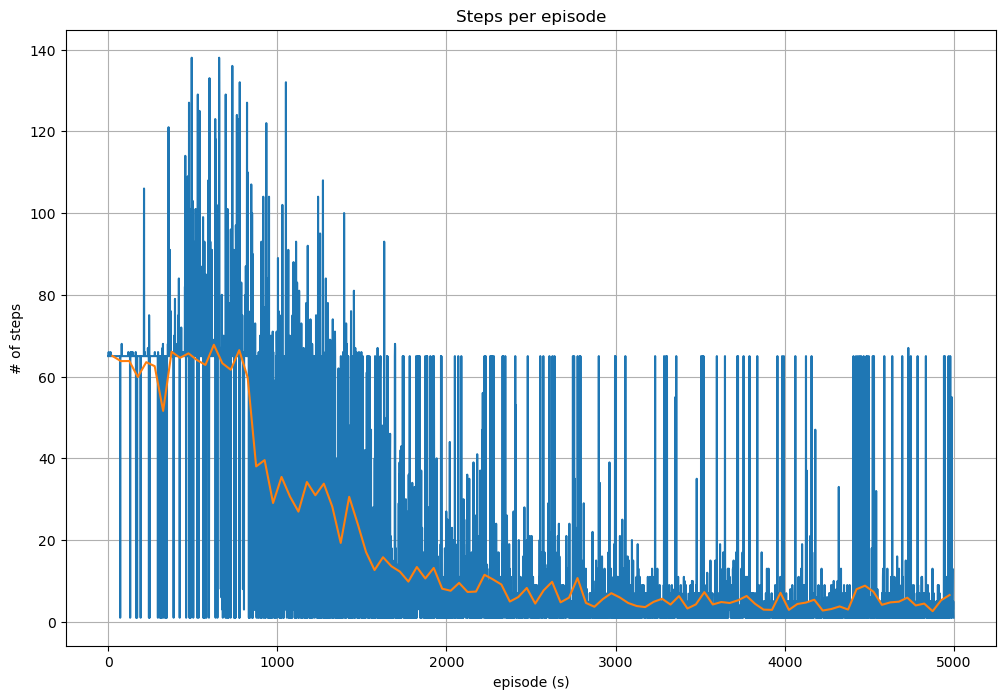

In [98]:
if start_training:
    plot_history(history, infos)

## Continue training with almost solved puzzle (5 moves away)

In [100]:
min_epsilon = 0.1
max_epsilon = 0.9
decay = 0.0005
epsilon = max_epsilon
#num_of_episodes = 5000
#enviroment.improve_limit = 32
history = []
infos = []
if start_training:
    history, infos = train(agent, num_of_episodes, timesteps_per_episode, epsilon, 5, 
                           min_epsilon, max_epsilon, batch_size, decay)

Original state
[[ 4  1  2  3]
 [ 5  6  0  7]
 [ 8  9 10 11]
 [12 13 14 15]]
-A--!!!!!!!!!!!!!T!+-!!+!!-!!!+-!!T!!!!!!+-!!!!!!!!T!!!!!+!!-!!!!!!!T!
1 done in 65 steps. Iteration limit reached. Start score 437 End score -1. epsilon 0.9
**********************************
Episode: 0  epsilon 0.9
[[ 4  1  2  3]
 [ 5  6 10  7]
 [ 8  9 11 15]
 [12 13 14  0]]
actions: [ 5 29 31  0] last action No South 
Retrained 4 times aligned 1 times
**********************************
Original state
[[ 4  1  2  3]
 [ 0  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
--!-++-+--!!!-!T-!!++!-!-!!!!!!!T!!!!!!!!!+!!!+!!T-!-!!!!+-!!!!+-!T!!
2 done in 65 steps. Iteration limit reached. Start score 459 End score -1. epsilon 0.9
**********************************
Episode: 1  epsilon 0.9
[[ 4  1  2  3]
 [ 8  5  6  7]
 [ 9 13 10 11]
 [12 14 15  0]]
actions: [ 2 24 32  7] last action No East 
Retrained 4 times aligned 0 times
**********************************
Original state
[[ 4  1  2  3]
 [ 5  9  6  7]
 [ 8  0 10 11]
 [12 1

Original state
[[ 4  0  2  3]
 [ 8  1  6  7]
 [ 9  5 10 11]
 [12 13 14 15]]
------T^^--------------T+---+---+---+-+-T+-----+-+--+--++T-A+--------------T---
4991 done in 73 steps. Iteration limit reached. Start score 269 End score 437. epsilon 0.16603016794497294
**********************************
Episode: 4990  epsilon 0.16603016794497294
[[ 2  3  0  5]
 [ 4  6  1  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [13 24 13 23] last action No West 
Retrained 5 times aligned 1 times
**********************************
Original state
[[ 4  1  2  3]
 [ 5  9  6  7]
 [ 8  0 10 11]
 [12 13 14 15]]
^^$
4992 done in 3 steps. Puzzle solved. Start score 269 End score 600. epsilon 0.165997161113396
**********************************
Episode: 4991  epsilon 0.165997161113396
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [2 0 0 1] last action No North 
Retrained 0 times aligned 0 times
**********************************
Original state
[[ 1  2  6  3]
 [ 0  4  5  7]
 [ 8  9 10 11]
 [12


4998 done in 3 steps. Puzzle solved. Start score 449 End score 600. epsilon 0.16579946632051618
**********************************
Episode: 4997  epsilon 0.16579946632051618
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [1 1 0 1] last action No West 
Retrained 0 times aligned 0 times
**********************************
Original state
[[ 4  0  2  3]
 [ 5  1  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
---+--T------+-+-------T--------+-+-!---T----------------T--------!+-
4999 done in 65 steps. Iteration limit reached. Start score 449 End score 449. epsilon 0.1657665748109186
**********************************
Episode: 4998  epsilon 0.1657665748109186
[[ 4  2  0  3]
 [ 5  1  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
actions: [ 6 28  6 25] last action No West 
Retrained 4 times aligned 0 times
**********************************
Original state
[[ 1  5  2  3]
 [ 4  9  6  7]
 [ 8  0 10 11]
 [12 13 14 15]]
-+^^$
5000 done in 5 steps. Puzzle solved. Start score 269 End score 600. ep

3827.9494245999995 seconds elapsed


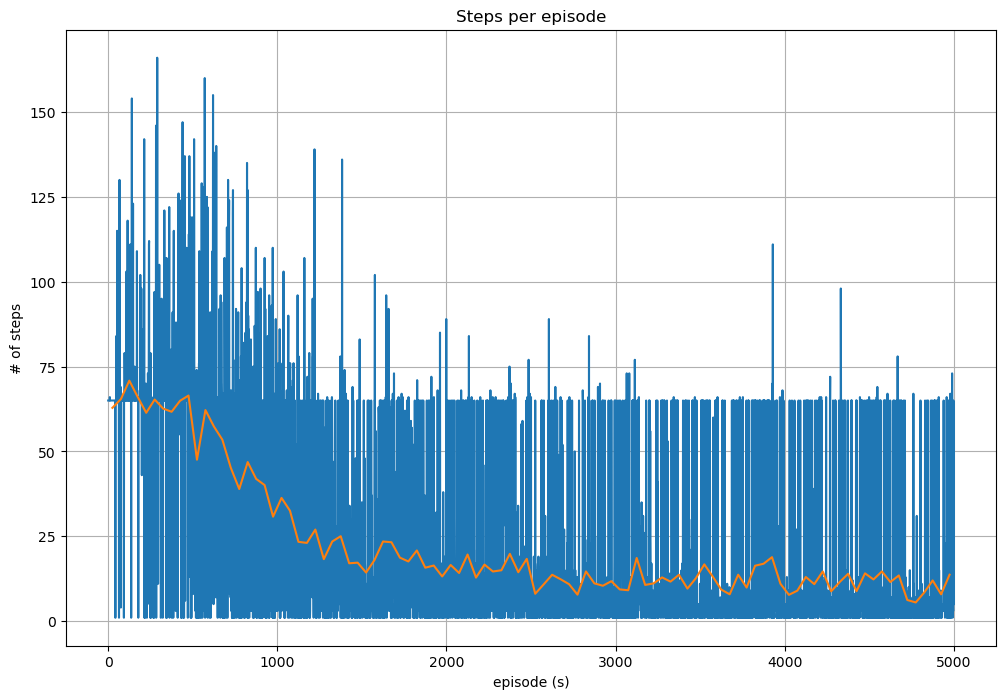

In [101]:
if start_training:
    plot_history(history, infos)

In [102]:
if start_training:
    agent.q_network.save('15_after_start.keras')
    save_history_infos("15_saved_history.py", history, infos)

## Test after initial training

In [104]:
#agent.load_models('15_after_start.keras')
#%run -i "15_saved_history.py"

test(agent, enviroment, 10, 3)

Episode: 0.
$Episode: 0 1 epochs 0 penalties
Episode: 1.
$Episode: 1 1 epochs 0 penalties
Episode: 2.
^^$Episode: 2 3 epochs 0 penalties
Episode: 3.
-+$Episode: 3 3 epochs 1 penalties
Episode: 4.
^^$Episode: 4 3 epochs 0 penalties
Episode: 5.
$Episode: 5 1 epochs 0 penalties
Episode: 6.
$Episode: 6 1 epochs 0 penalties
Episode: 7.
$Episode: 7 1 epochs 0 penalties
Episode: 8.
^^$Episode: 8 3 epochs 0 penalties
Episode: 9.
$Episode: 9 1 epochs 0 penalties
**********************************
Results
**********************************
Epochs per episode: 1.8
Penalties per episode: 0.1
Solved: 10 of 10


In [105]:
#agent.load_models('15_after_start.keras')
#%run -i "15_saved_history.py"

test(agent, enviroment, 10, 3)

Episode: 0.
-+-----+$Episode: 0 9 epochs 0 penalties
Episode: 1.
-^$Episode: 1 3 epochs 0 penalties
Episode: 2.
^^-+-+--++$Episode: 2 11 epochs 2 penalties
Episode: 3.
^^$Episode: 3 3 epochs 0 penalties
Episode: 4.
$Episode: 4 1 epochs 0 penalties
Episode: 5.
$Episode: 5 1 epochs 0 penalties
Episode: 6.
-+$Episode: 6 3 epochs 0 penalties
Episode: 7.
^-+^$Episode: 7 5 epochs 0 penalties
Episode: 8.
$Episode: 8 1 epochs 0 penalties
Episode: 9.
$Episode: 9 1 epochs 0 penalties
**********************************
Results
**********************************
Epochs per episode: 3.8
Penalties per episode: 0.2
Solved: 10 of 10


## Continue training

#### Call train.py for training and test.py for testing
agent.load_models() if not working in the notebook?